In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [24]:
import seaborn as sns

### Dataset import

In [3]:
train_dataset = pd.read_csv("/Users/soardr/FLIQ/Datasets/drug+induced+autoimmunity+prediction/DIA_trainingset_RDKit_descriptors.csv")
test_dataset = pd.read_csv("/Users/soardr/FLIQ/Datasets/drug+induced+autoimmunity+prediction/DIA_testset_RDKit_descriptors.csv")

In [14]:
train_columns = [_ for _ in train_dataset.columns]
test_columns = [_ for _ in test_dataset.columns]

In [19]:
len(train_columns)

198

In [20]:
train_dataset.shape, test_dataset.shape

((477, 198), (120, 198))

## Description of each of the columns

### General Identifiers
Label: Binary indicator denoting whether a compound is associated with drug-induced autoimmunity (e.g., 1 for positive, 0 for negative).

SMILES: Simplified Molecular Input Line Entry System; a textual representation of a molecule's structure.

### Topological and Connectivity Descriptors
BalabanJ: A topological index reflecting molecular connectivity and complexity.

BertzCT: A complexity index based on molecular graph theory.

Chi0: Zero-order molecular connectivity index; considers atom valence.

Chi0n: Zero-order molecular connectivity index for non-hydrogen atoms.

Chi0v: Zero-order valence molecular connectivity index.

Chi1: First-order molecular connectivity index; considers pairs of bonded atoms.

Chi1n: First-order molecular connectivity index for non-hydrogen atoms.

Chi1v: First-order valence molecular connectivity index.

Chi2n: Second-order molecular connectivity index for non-hydrogen atoms.

Chi2v: Second-order valence molecular connectivity index.

Chi3n: Third-order molecular connectivity index for non-hydrogen atoms.

Chi3v: Third-order valence molecular connectivity index.

Chi4n: Fourth-order molecular connectivity index for non-hydrogen atoms.

Chi4v: Fourth-order valence molecular connectivity index.

### Electrotopological State Descriptors
EState_VSA1 to EState_VSA11: Sum of electrotopological state values over specific van der Waals surface area ranges.

MaxAbsEStateIndex: Maximum absolute electrotopological state value in the molecule.

MaxEStateIndex: Maximum electrotopological state value in the molecule.

MinAbsEStateIndex: Minimum absolute electrotopological state value in the molecule.

MinEStateIndex: Minimum electrotopological state value in the molecule.

### Partial Charge Descriptors
MaxAbsPartialCharge: Maximum absolute partial atomic charge in the molecule.

MaxPartialCharge: Maximum partial atomic charge in the molecule.

MinAbsPartialCharge: Minimum absolute partial atomic charge in the molecule.

MinPartialCharge: Minimum partial atomic charge in the molecule.

### Molecular Properties
ExactMolWt: Exact molecular weight calculated using the exact isotopic masses.

MolWt: Average molecular weight based on standard atomic weights.

MolLogP: Logarithm of the partition coefficient between octanol and water; indicates hydrophobicity.

MolMR: Molar refractivity; related to the molecule's polarizability.

FractionCSP3: Fraction of sp³-hybridized carbon atoms; indicates saturation level.

LabuteASA: Approximate surface area calculated using Labute's method.

TPSA: Topological Polar Surface Area; sum of surface areas of polar atoms.

### Atom and Bond Counts
HeavyAtomCount: Number of non-hydrogen atoms.

HeavyAtomMolWt: Molecular weight of heavy atoms.

NumHAcceptors: Number of hydrogen bond acceptors.

NumHDonors: Number of hydrogen bond donors.

NumHeteroatoms: Number of atoms other than carbon and hydrogen.

NumRadicalElectrons: Number of unpaired electrons.

NumRotatableBonds: Number of bonds that allow free rotation.

NumValenceElectrons: Total number of valence electrons.

### Ring and Cycle Descriptors
RingCount: Total number of rings in the molecule.

NumAliphaticCarbocycles: Number of aliphatic carbocyclic rings.

NumAliphaticHeterocycles: Number of aliphatic heterocyclic rings.

NumAliphaticRings: Total number of aliphatic rings.

NumAromaticCarbocycles: Number of aromatic carbocyclic rings.

NumAromaticHeterocycles: Number of aromatic heterocyclic rings.

NumAromaticRings: Total number of aromatic rings.

NumSaturatedCarbocycles: Number of saturated carbocyclic rings.

NumSaturatedHeterocycles: Number of saturated heterocyclic rings.

NumSaturatedRings: Total number of saturated rings.

### Kappa Shape Indices
Kappa1: First-order kappa shape index; indicates molecular flexibility.

Kappa2: Second-order kappa shape index; relates to molecular shape.

Kappa3: Third-order kappa shape index; provides information on molecular branching.

### Information Content and Complexity
Ipc: Information content index; measures molecular complexity.

HallKierAlpha: Descriptor related to molecular size and branching.

### Surface Area Descriptors
PEOE_VSA1 to PEOE_VSA14: Sum of partial charges over specific van der Waals surface area ranges.

SMR_VSA1 to SMR_VSA10: Sum of molar refractivity over specific van der Waals surface area ranges.

SlogP_VSA1 to SlogP_VSA12: Sum of logP contributions over specific van der Waals surface area ranges.

VSA_EState1 to VSA_EState10: Sum of electrotopological state values over specific van der Waals surface area ranges.

### Functional Group Counts (fr_ prefixed)
These descriptors count the presence of specific functional groups within the molecule, which can influence its reactivity and biological activity:

fr_Al_COO: Number of aliphatic carboxylic acid groups.

fr_Al_OH: Number of aliphatic hydroxyl groups.

fr_Al_OH_noTert: Number of aliphatic hydroxyl groups excluding tertiary alcohols.

fr_ArN: Number of nitrogen functional groups attached to aromatic systems.

fr_Ar_COO: Number of aromatic carboxylic acid groups.

fr_Ar_N: Number of aromatic nitrogen atoms.

fr_Ar_NH: Number of aromatic amine groups.

fr_Ar_OH: Number of aromatic hydroxyl groups (phenols).

fr_COO: Number of carboxylic acid groups.

fr_COO2: Number of carboxylic acid groups.

fr_C_O: Number of carbonyl oxygen atoms.

fr_C_O_noCOO: Number of carbonyl oxygen atoms excluding those in carboxylic acids.

fr_C_S: Number of thiocarbonyl groups

fr_HOCCN – Presence of HO–C–C–N motif (hydroxyethylamine or similar).

fr_Imine – Imine group (C=NH or C=NR).

fr_NH0 – Tertiary amines or quaternary N (no attached hydrogen).

fr_NH1 – Secondary amines (one hydrogen on nitrogen).

fr_NH2 – Primary amines (two hydrogens on nitrogen).

fr_N_O – Nitroso group (N–O).

fr_Ndealkylation1 – Likely site of mono-N-dealkylation.

fr_Ndealkylation2 – Likely site of bis-N-dealkylation.

fr_Nhpyrrole – Pyrrole nitrogen (in 5-membered heterocycles).

fr_SH – Thiol group (–SH).

fr_aldehyde – Aldehyde group (–CHO).

fr_alkyl_carbamate – Alkyl carbamate (R–O–C(=O)–NR2).

fr_alkyl_halide – Alkyl halides (R–X, where X = F, Cl, Br, I).

fr_allylic_oxid – Allylic alcohol or oxidation site (C=C–C–OH).

fr_amide – Amide group (R–CO–NR2).

fr_amidine – Amidines (C(=NH)–NH2 or variants).

fr_aniline – Aniline structure (aromatic amine).

fr_aryl_methyl – Aromatic methyl groups (Ar–CH3).

fr_azide – Azide group (–N₃).

fr_azo – Azo group (R–N=N–R').

fr_barbitur – Barbiturate-like structure.

fr_benzene – Benzene ring present.

fr_benzodiazepine – Benzodiazepine scaffold.

fr_bicyclic – Fused or bridged bicyclic ring systems.

fr_diazo – Diazo group (–N=N+).

fr_dihydropyridine – Dihydropyridine ring (partially reduced pyridine).

fr_epoxide – Epoxide ring (three-membered ether).

fr_ester – Ester group (R–COO–R').

fr_ether – Ether group (R–O–R').

fr_furan – Furan ring (5-membered oxygen heterocycle).

fr_guanido – Guanidine group (HNC(NH2)2).

fr_halogen – Any halogen atom (F, Cl, Br, I).

fr_hdrzine – Hydrazine group (–NH–NH2).

fr_hdrzone – Hydrazone group (C=NNH2).

fr_imidazole – Imidazole ring.

fr_imide – Imide group (two acyl groups on same nitrogen).

fr_isocyan – Isocyanate group (–N=C=O).

fr_isothiocyan – Isothiocyanate group (–N=C=S).

fr_ketone – Ketone group (C=O between carbons).

fr_ketone_Topliss – Ketone in Topliss QSAR pattern.

fr_lactam – Cyclic amide (lactam ring).

fr_lactone – Cyclic ester (lactone ring).

fr_methoxy – Methoxy group (–OCH₃).

fr_morpholine – Morpholine ring (O- and N-containing six-membered ring).

fr_nitrile – Nitrile group (–C≡N).

fr_nitro – Nitro group (–NO₂).

fr_nitro_arom – Aromatic nitro group (Ar–NO₂).

fr_nitro_arom_nonortho – Aromatic nitro not ortho-substituted.

fr_nitroso – Nitroso group (–NO).

fr_oxazole – Oxazole ring (5-membered N, O heterocycle).

fr_oxime – Oxime group (C=NOH).

fr_para_hydroxylation – Para-hydroxylated aromatic ring.

fr_phenol – Phenol group (Ar–OH).

fr_phenol_noOrthoHbond – Phenol without ortho-H-bonding.

fr_phos_acid – Phosphoric acid group (P–OH).

fr_phos_ester – Phosphate ester group.

fr_piperdine – Piperidine ring (saturated N-heterocycle).

fr_piperzine – Piperazine ring (N–C–C–N six-membered ring).

fr_priamide – Primary amide (–CONH₂).

fr_prisulfonamd – Primary sulfonamide (–SO₂NH₂).

fr_pyridine – Pyridine ring (aromatic nitrogen heterocycle).

fr_quatN – Quaternary ammonium ion (N⁺R₄).

fr_sulfide – Sulfide group (R–S–R').

fr_sulfonamd – Sulfonamide (R–SO₂–NR₂).

fr_sulfone – Sulfone group (R–SO₂–R').

fr_term_acetylene – Terminal alkyne group (–C≡CH).

fr_tetrazole – Tetrazole ring (5-membered N₄ heterocycle).

fr_thiazole – Thiazole ring (5-membered S, N heterocycle).

fr_thiocyan – Thiocyanate group (–SCN or –NCS).

fr_thiophene – Thiophene ring (5-membered S heterocycle).

fr_unbrch_alkane – Unbranched alkane chain.

fr_urea – Urea group (–NH–CO–NH–).

## Some EDA

In [ ]:
list(train_dataset.dtypes)

### Correlation matrix

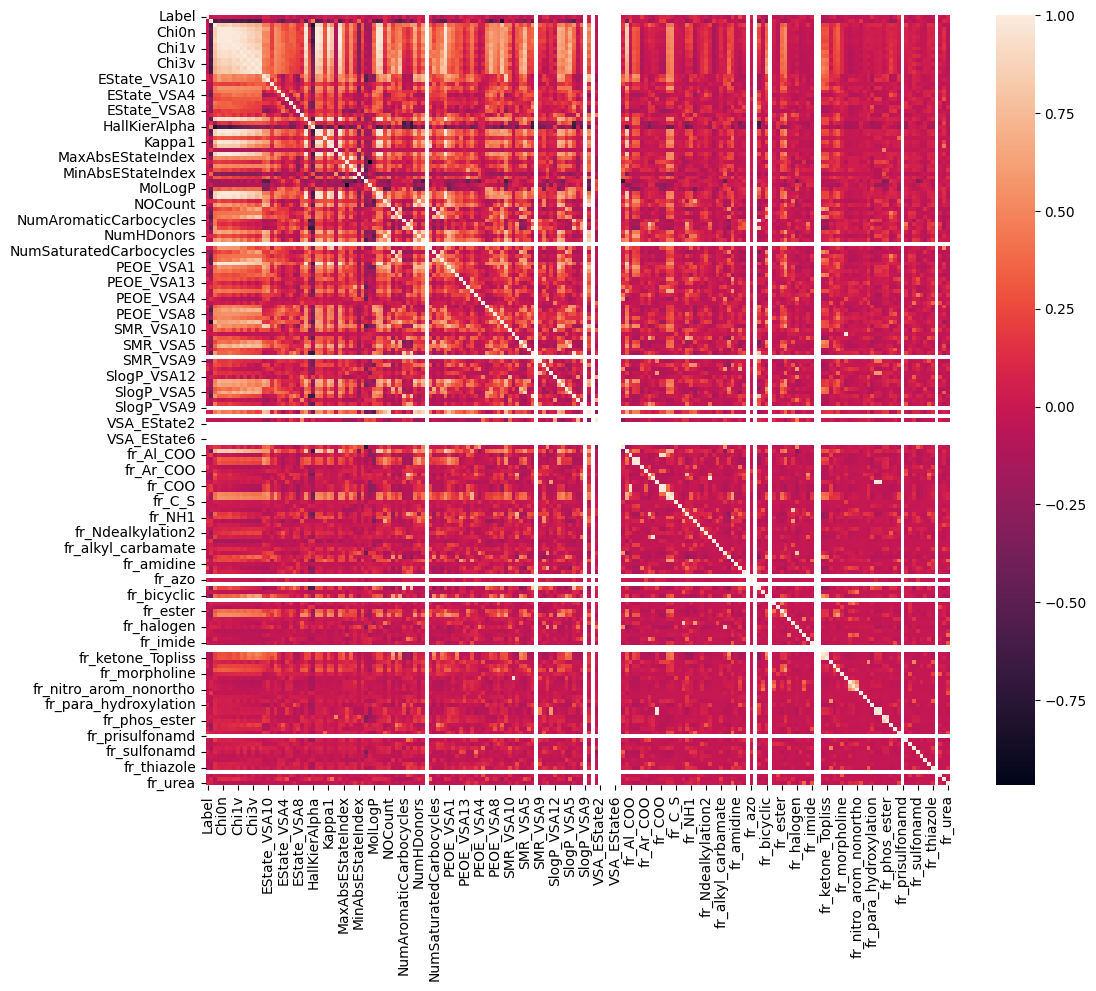

In [51]:
plt.figure(figsize=(12, 10))
dataplot = sns.heatmap(train_dataset.corr(numeric_only=True))
plt.show()

In [32]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Columns: 198 entries, Label to fr_urea
dtypes: float64(83), int64(114), object(1)
memory usage: 738.0+ KB


In [33]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Columns: 198 entries, Label to fr_urea
dtypes: float64(83), int64(114), object(1)
memory usage: 185.8+ KB


array([[<Axes: title={'center': 'Label'}>]], dtype=object)

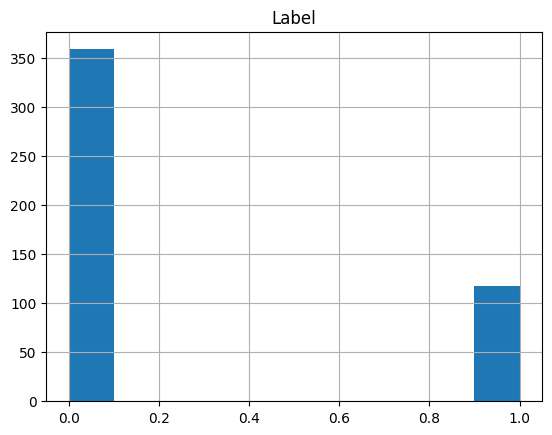

In [37]:
train_dataset.hist(column="Label")

array([[<Axes: title={'center': 'Label'}>]], dtype=object)

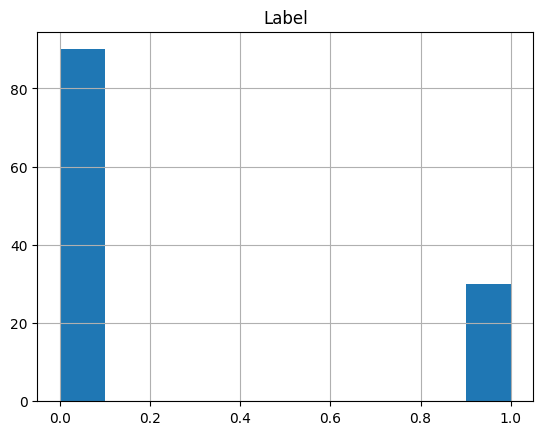

In [35]:
test_dataset.hist(column="Label")

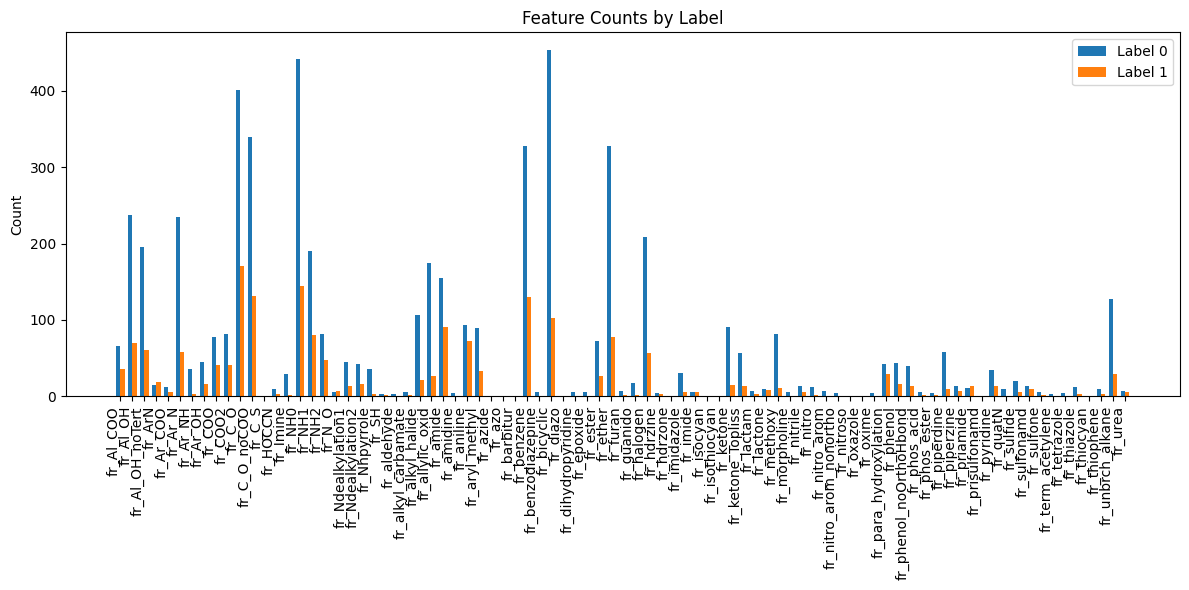

In [48]:
feature_columns = train_dataset.columns[113:]
label_column = 'Label'

label_values = train_dataset[label_column].unique()
label_values.sort()

counts = []
for col in feature_columns:
    col_counts = []
    for label in label_values:
        count = train_dataset[train_dataset[label_column] == label][col].sum()
        col_counts.append(count)
    counts.append(col_counts)

counts = np.array(counts)

x = np.arange(len(feature_columns))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
for i, label in enumerate(label_values):
    ax.bar(x + i*width, counts[:, i], width, label=f'Label {label}')

ax.set_ylabel('Count')
ax.set_title('Feature Counts by Label')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(feature_columns, rotation=90, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

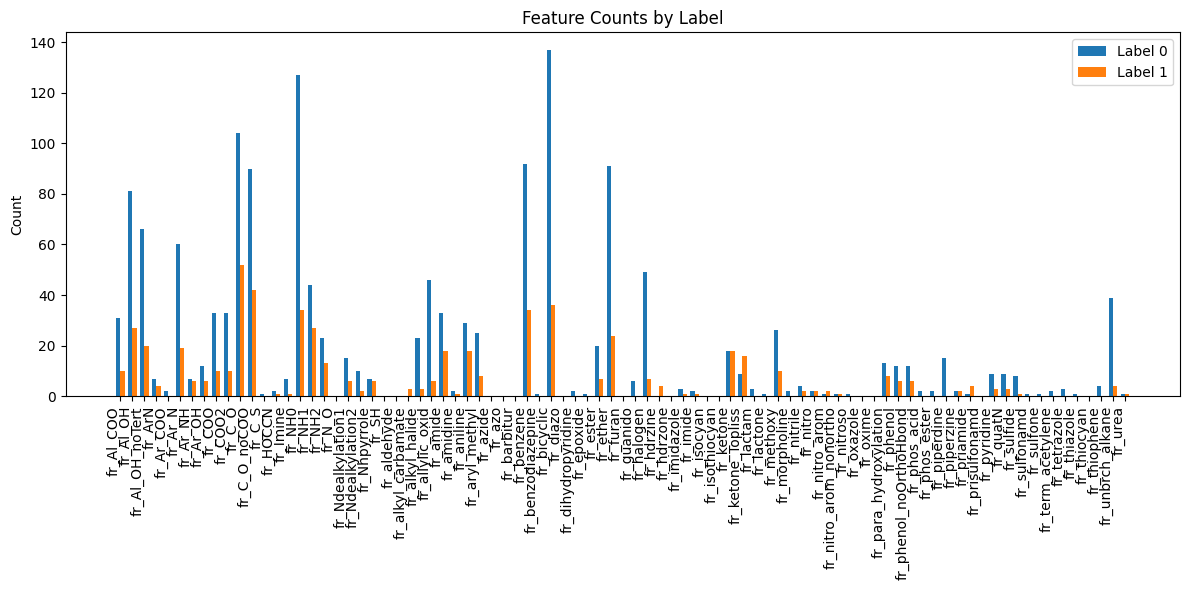

In [49]:
feature_columns = test_dataset.columns[113:]
label_column = 'Label'

label_values = test_dataset[label_column].unique()
label_values.sort()

counts = []
for col in feature_columns:
    col_counts = []
    for label in label_values:
        count = test_dataset[test_dataset[label_column] == label][col].sum()
        col_counts.append(count)
    counts.append(col_counts)

counts = np.array(counts)

x = np.arange(len(feature_columns))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
for i, label in enumerate(label_values):
    ax.bar(x + i*width, counts[:, i], width, label=f'Label {label}')

ax.set_ylabel('Count')
ax.set_title('Feature Counts by Label')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(feature_columns, rotation=90, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [50]:
len(feature_columns)

85